In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [3]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
for col in df_train.columns:
    print('column: {:>10}\t Percent of NaN {: .2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0])))

column: PassengerId	 Percent of NaN  0.00%
column:   Survived	 Percent of NaN  0.00%
column:     Pclass	 Percent of NaN  0.00%
column:       Name	 Percent of NaN  0.00%
column:        Sex	 Percent of NaN  0.00%
column:        Age	 Percent of NaN  19.87%
column:      SibSp	 Percent of NaN  0.00%
column:      Parch	 Percent of NaN  0.00%
column:     Ticket	 Percent of NaN  0.00%
column:       Fare	 Percent of NaN  0.00%
column:      Cabin	 Percent of NaN  77.10%
column:   Embarked	 Percent of NaN  0.22%


In [5]:
for col in df_test.columns:
    print('column: {:>10}\t Percent of NaN {: .2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0])))

column: PassengerId	 Percent of NaN  0.00%
column:     Pclass	 Percent of NaN  0.00%
column:       Name	 Percent of NaN  0.00%
column:        Sex	 Percent of NaN  0.00%
column:        Age	 Percent of NaN  20.57%
column:      SibSp	 Percent of NaN  0.00%
column:      Parch	 Percent of NaN  0.00%
column:     Ticket	 Percent of NaN  0.00%
column:       Fare	 Percent of NaN  0.24%
column:      Cabin	 Percent of NaN  78.23%
column:   Embarked	 Percent of NaN  0.00%


<AxesSubplot:>

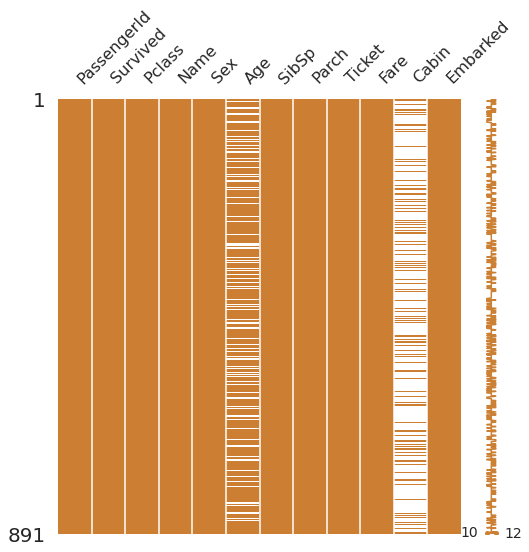

In [6]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

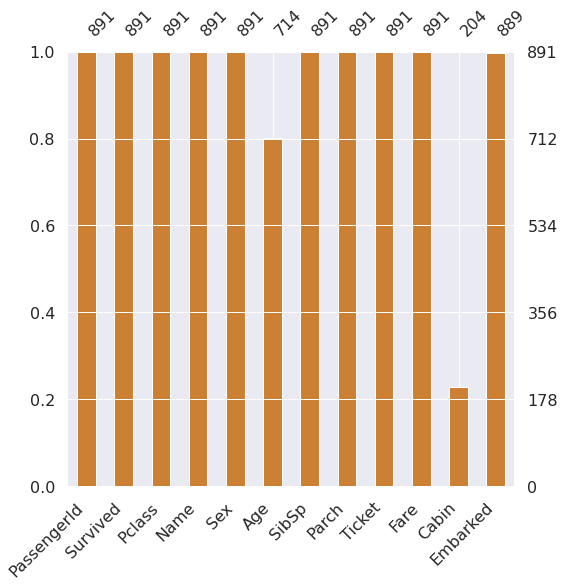

In [7]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<function matplotlib.pyplot.show(close=None, block=None)>

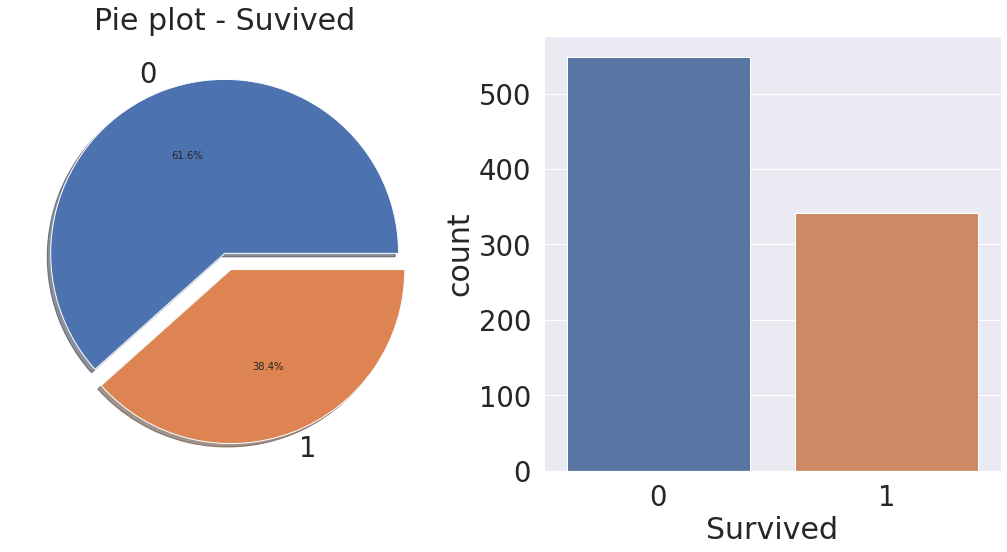

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))#1개의 행에 2개의 그림 사이즈는 가로 18, 높이 8

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True) #ax[i] 어느 위치에 그릴지 결정
ax[0].set_title('Pie plot - Suvived')
ax[0].set_ylabel('') #<- 다른거 추가하면 y축에 인자값이 출력됨.
sns.countplot('Survived', data=df_train, ax=ax[1]) #dataframe객체를 넣어주기전에 지정할 colume을 넣어준다.
#막대 그래프를 그린다.
plt.show

In [9]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
a = '당연히 Series 형' + str(type(df_train['Survived'].value_counts()))
print(a)

당연히 Series 형<class 'pandas.core.series.Series'>


<AxesSubplot:>

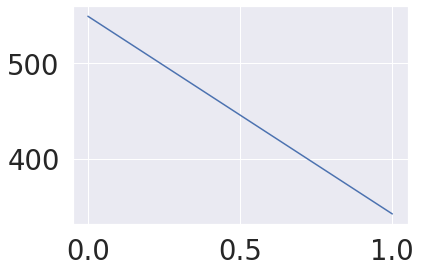

In [11]:
#series 여러개가 묶인거는 DataFrme
df_train['Survived'].value_counts().plot() #series객체는 plot()을 지원한다.

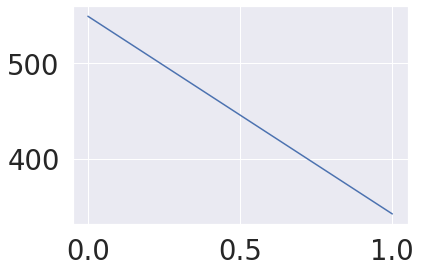

In [12]:
plt.plot(df_train['Survived'].value_counts()) #위와 같다.

<AxesSubplot:ylabel='Survived'>

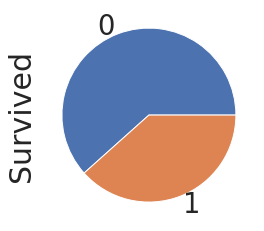

In [13]:
df_train['Survived'].value_counts().plot.pie()

<AxesSubplot:ylabel='Survived'>

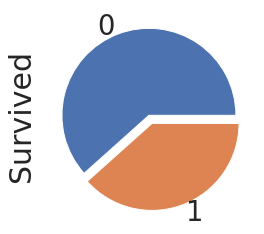

In [14]:
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1])

In [15]:
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)

<AxesSubplot:title={'center':'Pie plot - Suvived'}, ylabel='Survived'>

In [16]:
ax#ax는 방금전 f, ax = plt.subplots(1, 2, ..) <- 2개로 선언을 했기에 2개이다. [0] , [1]

array([<AxesSubplot:title={'center':'Pie plot - Suvived'}, ylabel='Survived'>,
       <AxesSubplot:xlabel='Survived', ylabel='count'>], dtype=object)

<AxesSubplot:ylabel='Survived'>

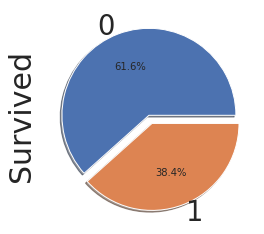

In [17]:
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True) #ax=ax[0]의 위치에 , shadow 그림자

In [18]:
df_train.shape #이제부터 해당 11개의 특성들이 어떤 상관관계가 존재하는지 알아보기

(891, 12)

# **> #Pclass**

In [19]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count() #Pclass는 1,2,3을 갖고있는데, 1, 2, 3은 Survived라는 값을 얼마나 갖고있는지. count는 말그대로 갯수를 말하는거기에 "Pclass의 비율에 의존적임."

,Survived
Pclass,
1,216
2,184
3,491


In [20]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']) #Pclass에 대해 묶어준다. 

In [21]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [22]:
df_train['Survived'].unique() #Survived가 갖고있는 값들

array([0, 1])

In [23]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [24]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass'>

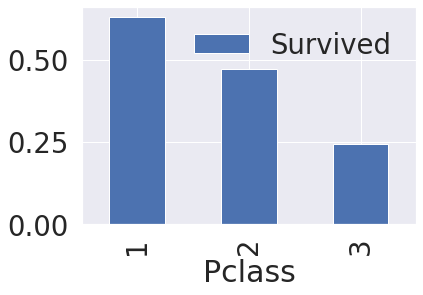

In [25]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar() #내림차순으로 'Survived'에 대하여 정
#여기서 해당평균이 생존률과 같음을 알수있다.

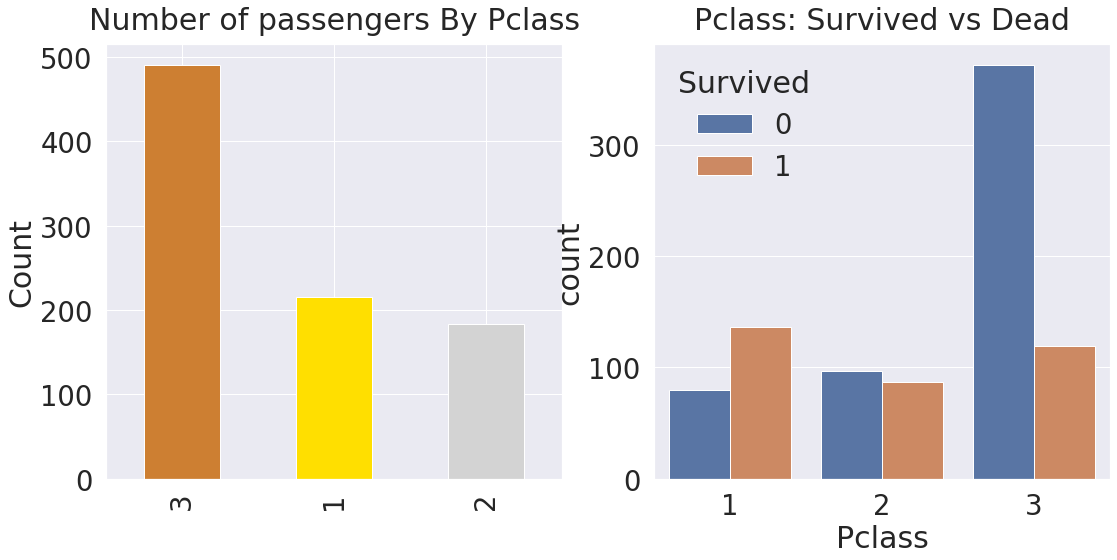

In [26]:
y_position = 1.02
f, ax = plt.subplots(1, 2 ,figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1]) # = df_train[['Pclass', 'Survived']].groupby(['Pclass']) 이거랑 같음 (0번 차트는 총합, 2번차트는 SUrvived 0, 1을 각각 나눠서 보여주는 차트)
#hue는 Pclass를 Survived로 나눠서 표현한다.
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

# > ******결론: Class가 높을수록 생존률이 높다.

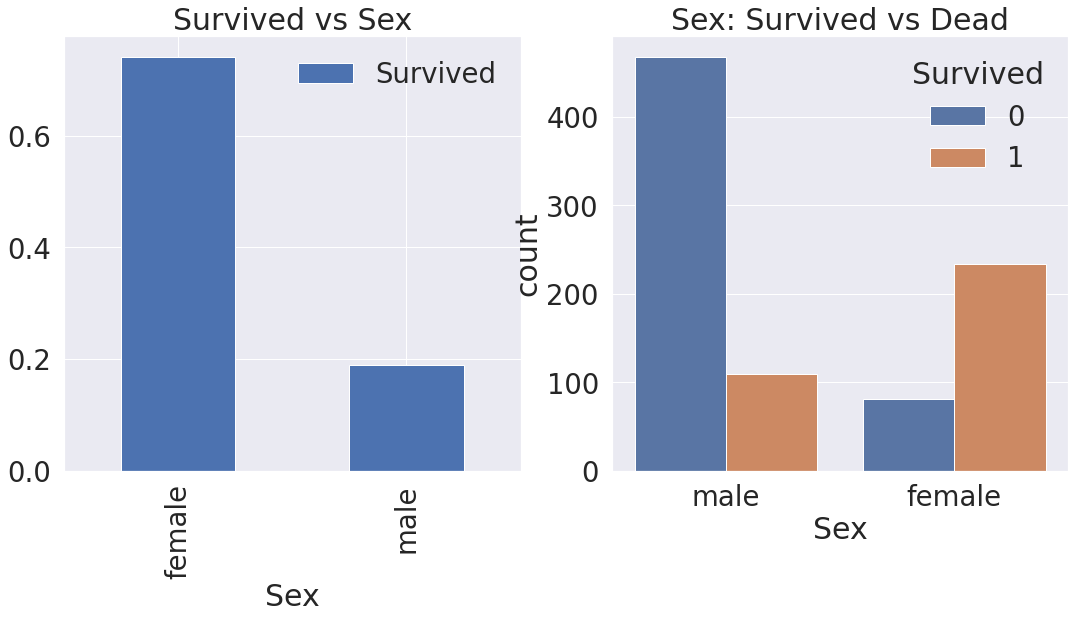

In [27]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

<AxesSubplot:xlabel='Sex'>

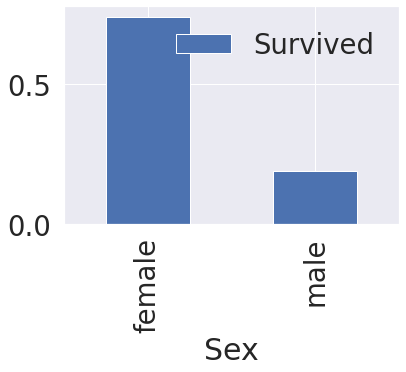

In [28]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar() #그림이 이상하게 나오는이유  figsize=(18, 8) 사이즈가 작아서

In [29]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [30]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=False).style.background_gradient(cmap='summer_r') #margins가 False일때

Survived,0,1
Sex,,
female,81,233
male,468,109


# # > ******# 이또한 생존률을 잘 나타낼 수 있다.

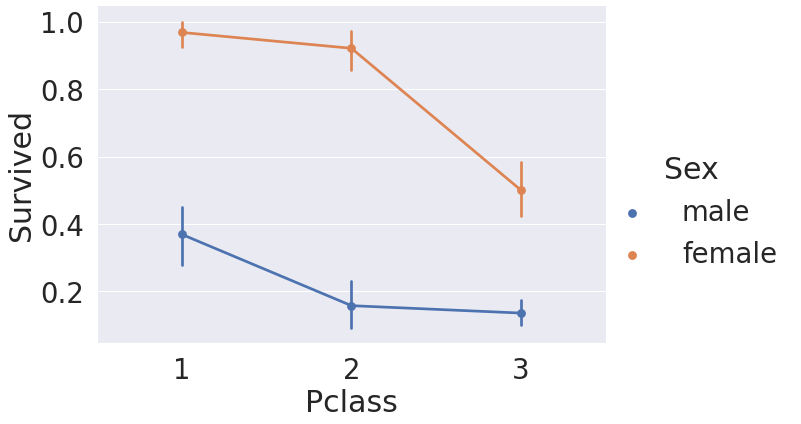

In [31]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)
#여기서 factorplot는 countplot보다 1개더 많은 특성을 표현가능하다.

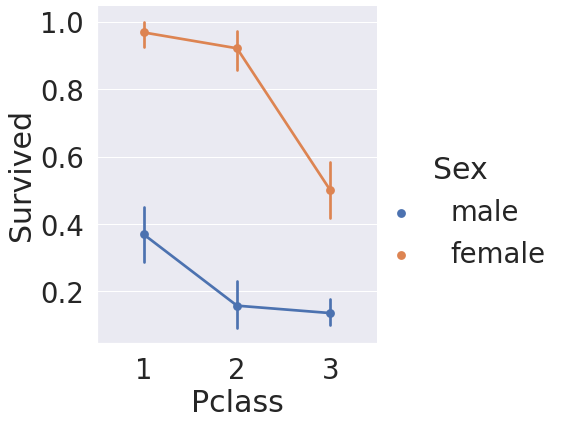

In [32]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1) #aspect는 폭임을 알수  있다.

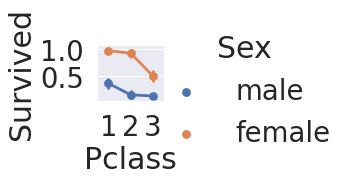

In [33]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=1, aspect=1.5) #전체 size를 조절한다는 걸 알 수 있다.

종합적으로 알수있는것.
-Lady first
-비싼 Class일수록 살 확률이 높다.

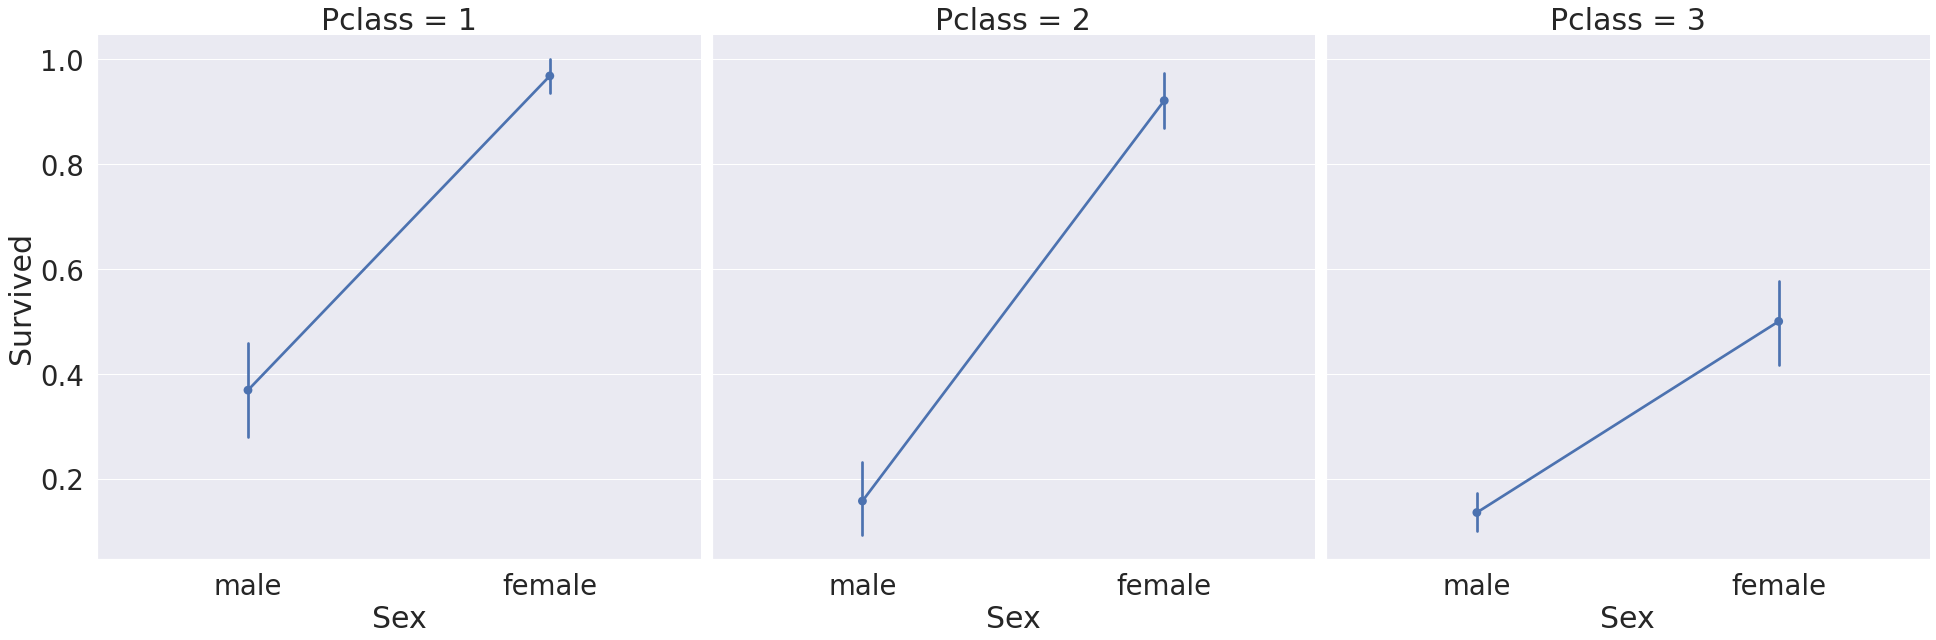

In [34]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satiration=.5,
              size=9, aspect=1) #col은 3개의 특성을 각각따로.

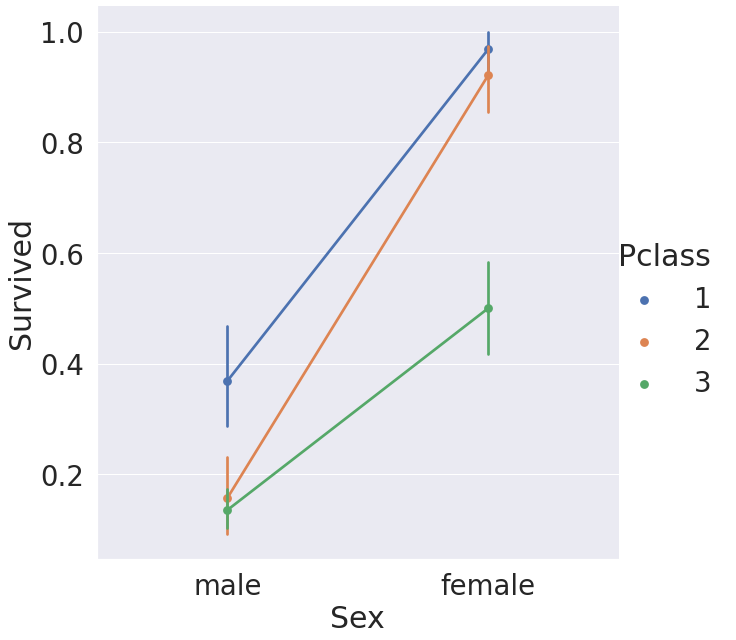

In [35]:
sns.factorplot(x='Sex', y='Survived', hue='Pclass', data=df_train, satiration=.5,
              size=9, aspect=1)# hue는 2개를 Pclass로 분류
#작대기 폭이 높을수록 애러가 높다. *에러바라고함.

# # # **AGE**

In [36]:
print('제일 나이 많은 탑승객 : {: .1f}'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {: .1f}'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {: .1f}'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 :  80.0
제일 어린 탑승객 :  0.4
탑승객 평균 나이 :  29.7


1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64


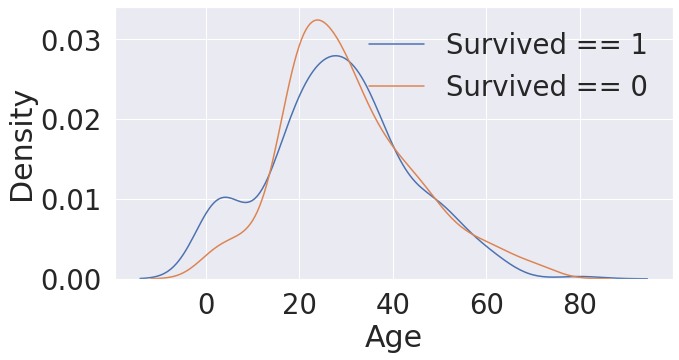

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
print(df_train[df_train['Survived'] == 1]['Age'])
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax) #이거 그리는 공식있
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

In [38]:
df_train[df_train['Survived'] == 1] #Survived가 1인 dataframe만 가져옴

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [39]:
df_train[df_train['Survived'] == 1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

<AxesSubplot:>

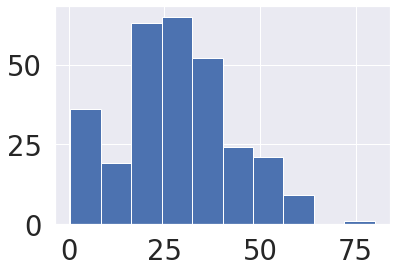

In [40]:
df_train[df_train['Survived'] == 1]['Age'].hist() #히스토그램을 부드럽게 그리는게 kdeplot이다.

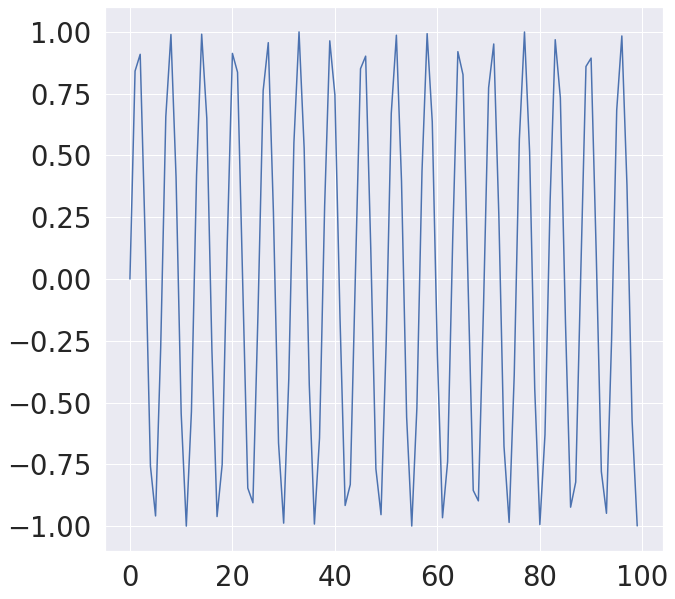

In [41]:
f, ax = plt.subplots(1, 1, figsize=(10, 10)) #도화지를 준비하는 방법 1
a = np.arange(100)
b = np.sin(a)
plt.plot(b)

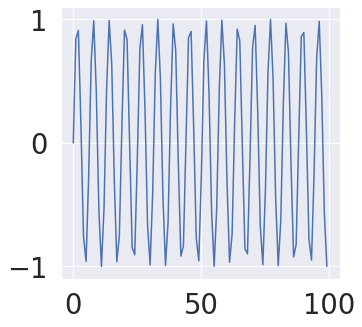

In [42]:
f = plt.figure(figsize=(5, 5)) #도화지를 준비하는 방법 2 <-얘는 ax를 받는게 아니라 그냥 도화지를 깐다.
a = np.arange(100)
b = np.sin(a)
plt.plot(b)

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

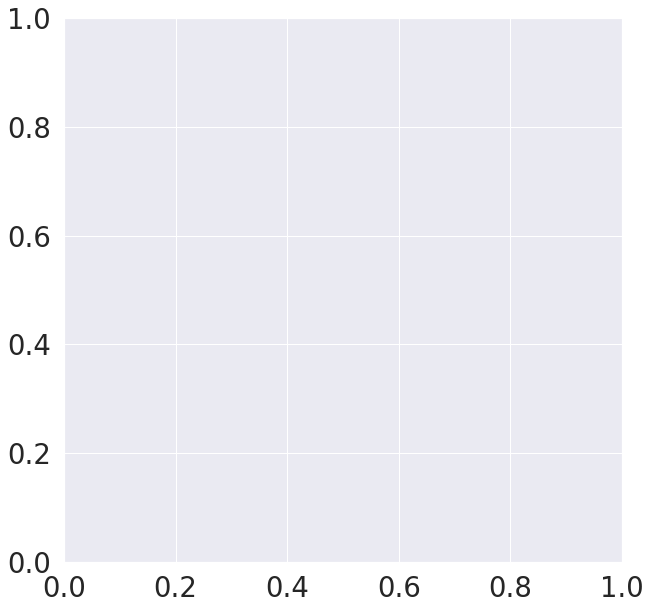

<Figure size 720x720 with 0 Axes>

In [43]:
f = plt.figure(figsize=(10, 10))
f, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.figure(figsize=(10, 10))
#이렇게 3가지 방법이 존재한다.

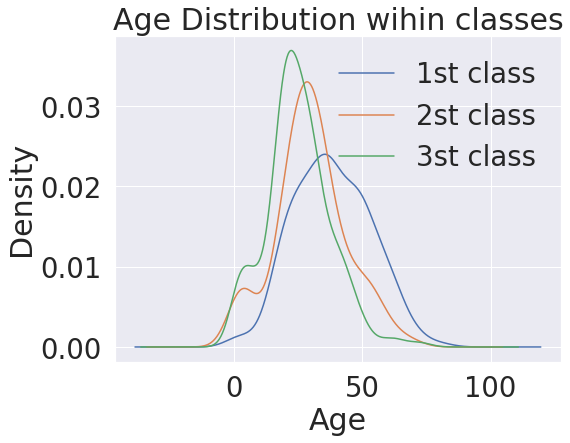

In [44]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution wihin classes')
plt.legend(['1st class', '2st class', '3st class'])

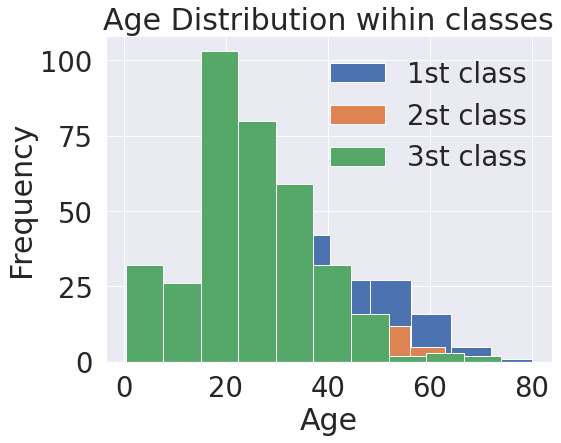

In [45]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='hist')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='hist')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='hist') 
plt.xlabel('Age') #라벨 선언 주의!
plt.title('Age Distribution wihin classes')
plt.legend(['1st class', '2st class', '3st class'])
#hist면 겹치는게 안보이는걸 알 수 있다.

Text(0.5, 0, 'sdf')

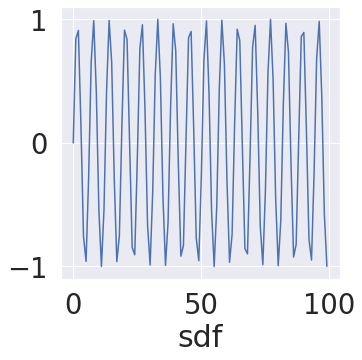

In [46]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))
a = np.arange(100)
b = np.sin(a)

ax.plot(b)
ax.set_xlabel('sdf') # <-라벨 선언 방식이 다르다 도화지 방식마다.

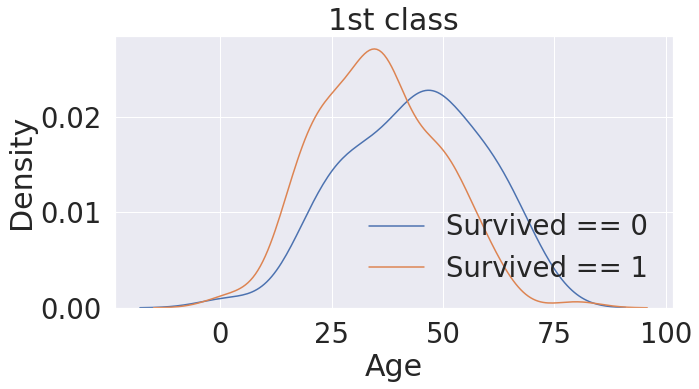

In [47]:
#생존, 사망 한사람들 중 pclass가 1인것 찾기.
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax=ax) #이거 그리는 공식있
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('1st class')
plt.show()

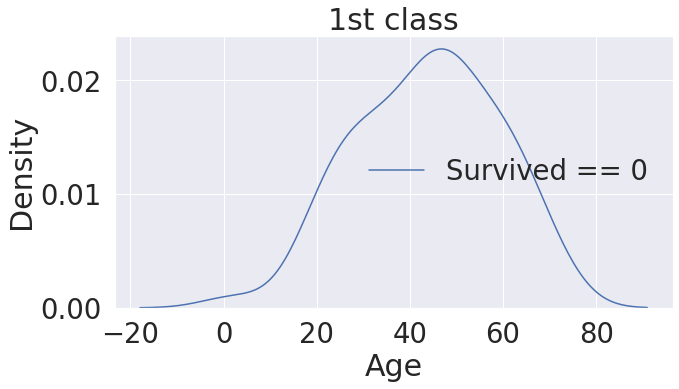

In [48]:
#생존, 사망 한사람들 중 pclass가 1인것 찾기.
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax=ax) #이거 그리는 공식있
#sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('1st class')
plt.show()

Text(0.5, 1.0, 'Age Distribution wihin classes')

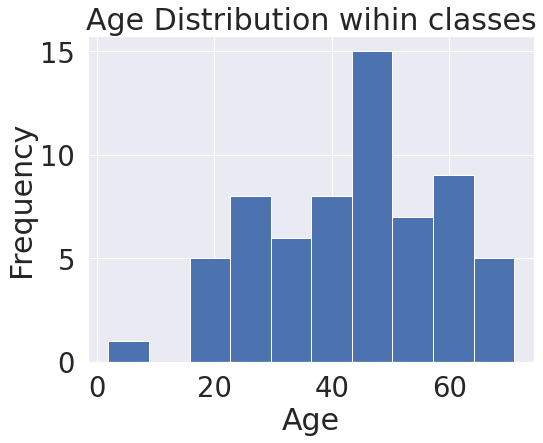

In [49]:
plt.figure(figsize=(8, 6))
df_train['Age'][(df_train['Pclass'] == 1) & (df_train['Survived'] == 0)].plot(kind='hist')
#df_train['Age'][(df_train['Pclass'] == 2) & (df_train['Survived'] == 0)].plot(kind='hist')
#df_train['Age'][(df_train['Pclass'] == 3) & (df_train['Survived'] == 0)].plot(kind='hist') 
plt.xlabel('Age') #라벨 선언 주의!
plt.title('Age Distribution wihin classes')
#plt.legend(['1st class', '2st class', '3st class'])
#해당 그래프를 근사한게 위의(위의 셀) 그래프이다! 계속 근사하기에 -까지 값이 간것이다!

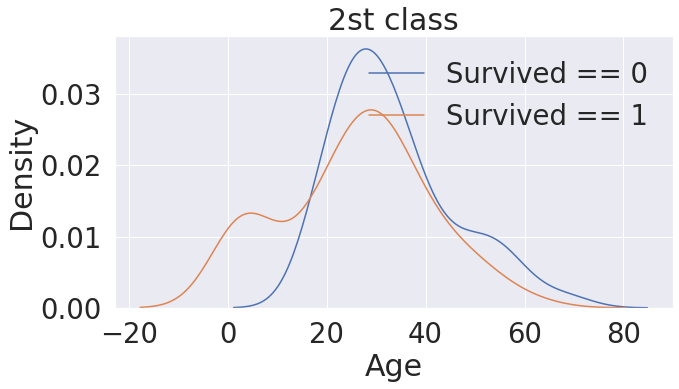

In [50]:
#생존, 사망 한사람들 중 pclass가 2인것 찾기.
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax=ax) #이거 그리는 공식있
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('2st class')
plt.show()
#여기서 나이인데 -가 나오는 것은 추정식? 이라그럼

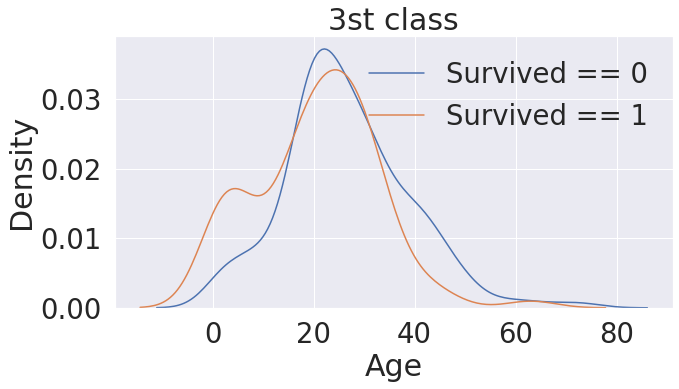

In [51]:
#생존, 사망 한사람들 중 pclass가 3인것 찾기.
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax=ax) #이거 그리는 공식있
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
plt.legend(['Survived == 0', 'Survived == 1'])
plt.title('3st class')
plt.show()

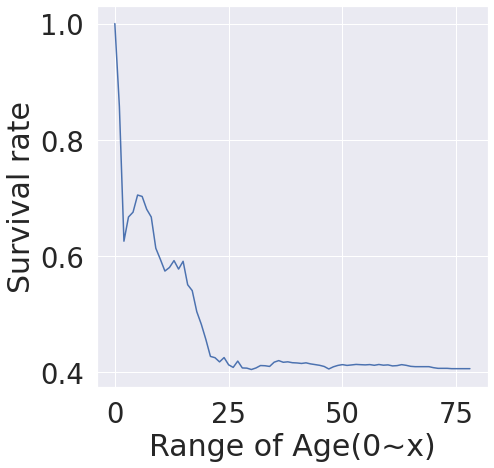

In [52]:
change_age_cumulate_survival_ratio = [] #나이를 다르게 했을때 생존률이 어캐달라지는지

for i in range(1, 80):
    change_age_cumulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(change_age_cumulate_survival_ratio)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

In [53]:
i = 10
df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']) #생존률을 알수있다.

0.6129032258064516

In [54]:
df_train[df_train['Age'] < i]['Survived'].sum()

38

In [55]:
len(df_train[df_train['Age'] < i]['Survived']) 

62

# # # Pclass, Sex, Age

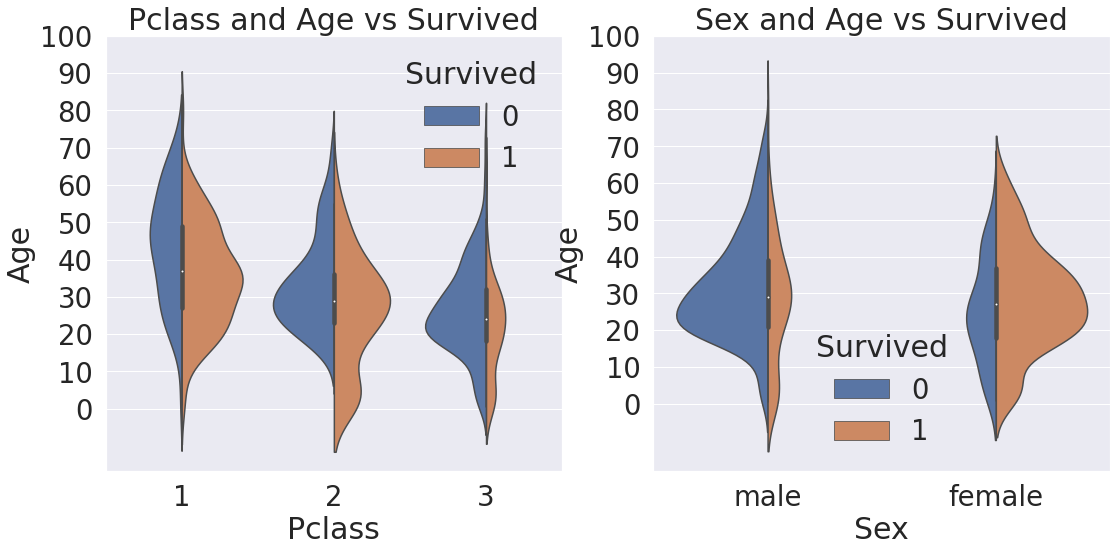

In [56]:
#해당 그래프로 각각 0과 1이 어떻게 분포되는지 보인다.
#https://seaborn.pydata.org/generated/seaborn.violinplot.html 여기서 옵션확인
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax =ax[0]) #그래프가 바이올린 닮아서
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

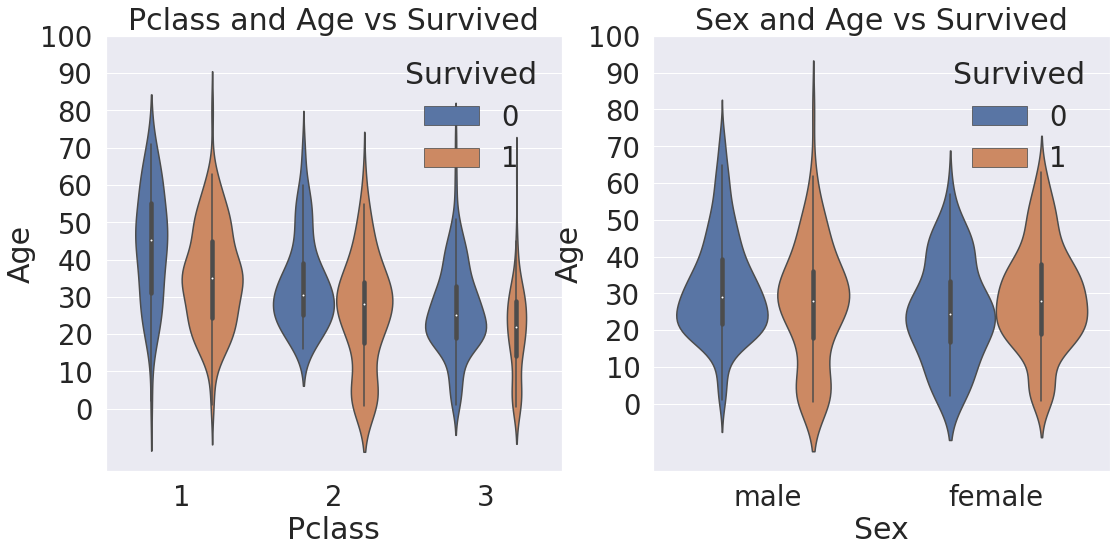

In [57]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=False, ax =ax[0]) #그래프가 바이올린 닮아서
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='area', split=False, ax=ax[1]) #area 설정 area는 0, 1 각각 동일한 면적을 갖도록 조정(count가 날라가는거라고 볼수있다.) 
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
#x,y 색, 3가지 표현이가능.

<AxesSubplot:xlabel='Embarked'>

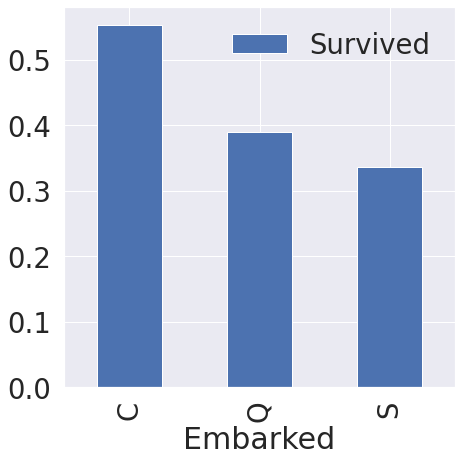

In [58]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

In [59]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [60]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived')

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


In [61]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_index()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<AxesSubplot:xlabel='Embarked'>

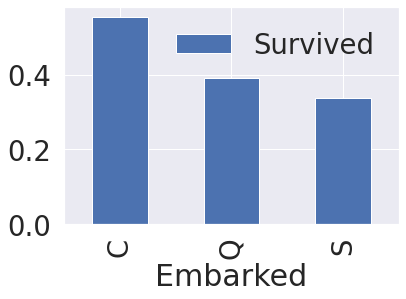

In [62]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar() #오름차순

<AxesSubplot:xlabel='Embarked'>

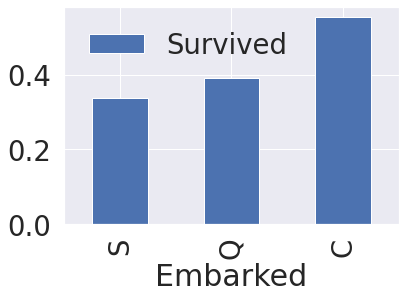

In [63]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=True).plot.bar() #오름차순

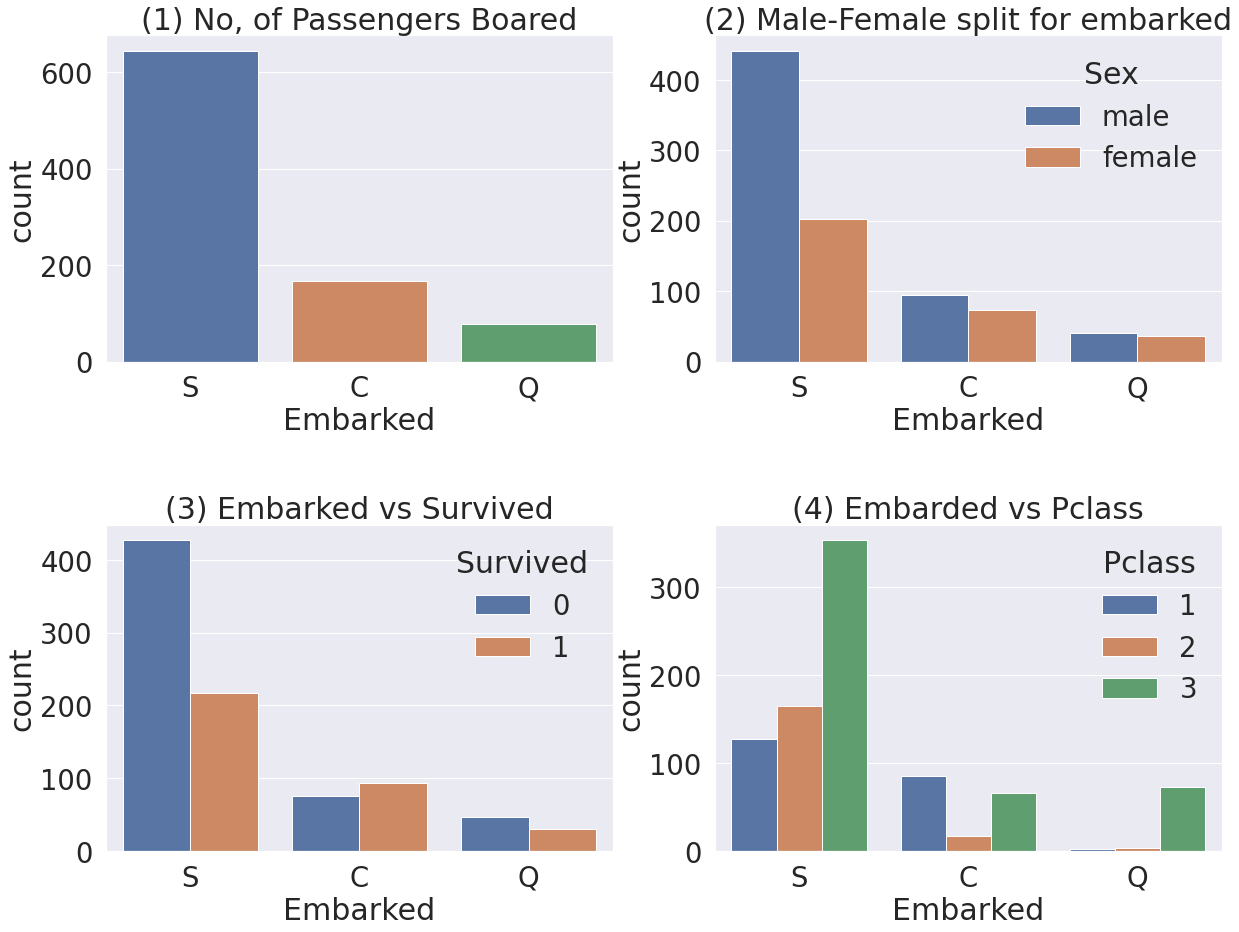

In [64]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0]) #2차원이기때문에!
ax[0, 0].set_title('(1) No, of Passengers Boared')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female split for embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarded vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

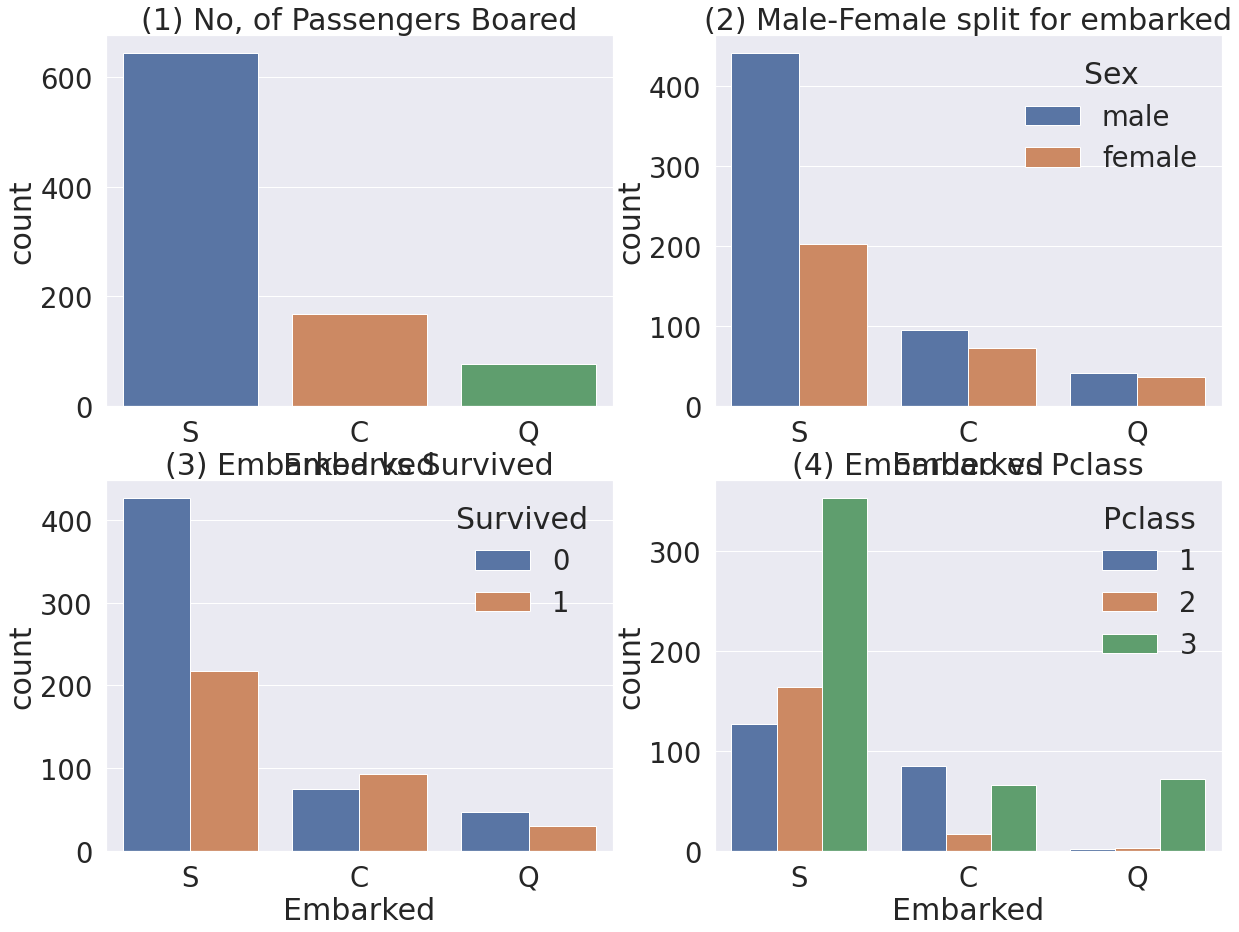

In [65]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0]) #2차원이기때문에!
ax[0, 0].set_title('(1) No, of Passengers Boared')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female split for embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarded vs Pclass')

#plt.subplots_adjust(wspace=0.2, hspace=0.5) PLT간에 사이 간격.
plt.show()

In [66]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1

In [67]:
print('Maximum size of Family:', df_train['FamilySize'].max())
print('Minimum size of Family:', df_train['FamilySize'].min())

Maximum size of Family: 11
Minimum size of Family: 1


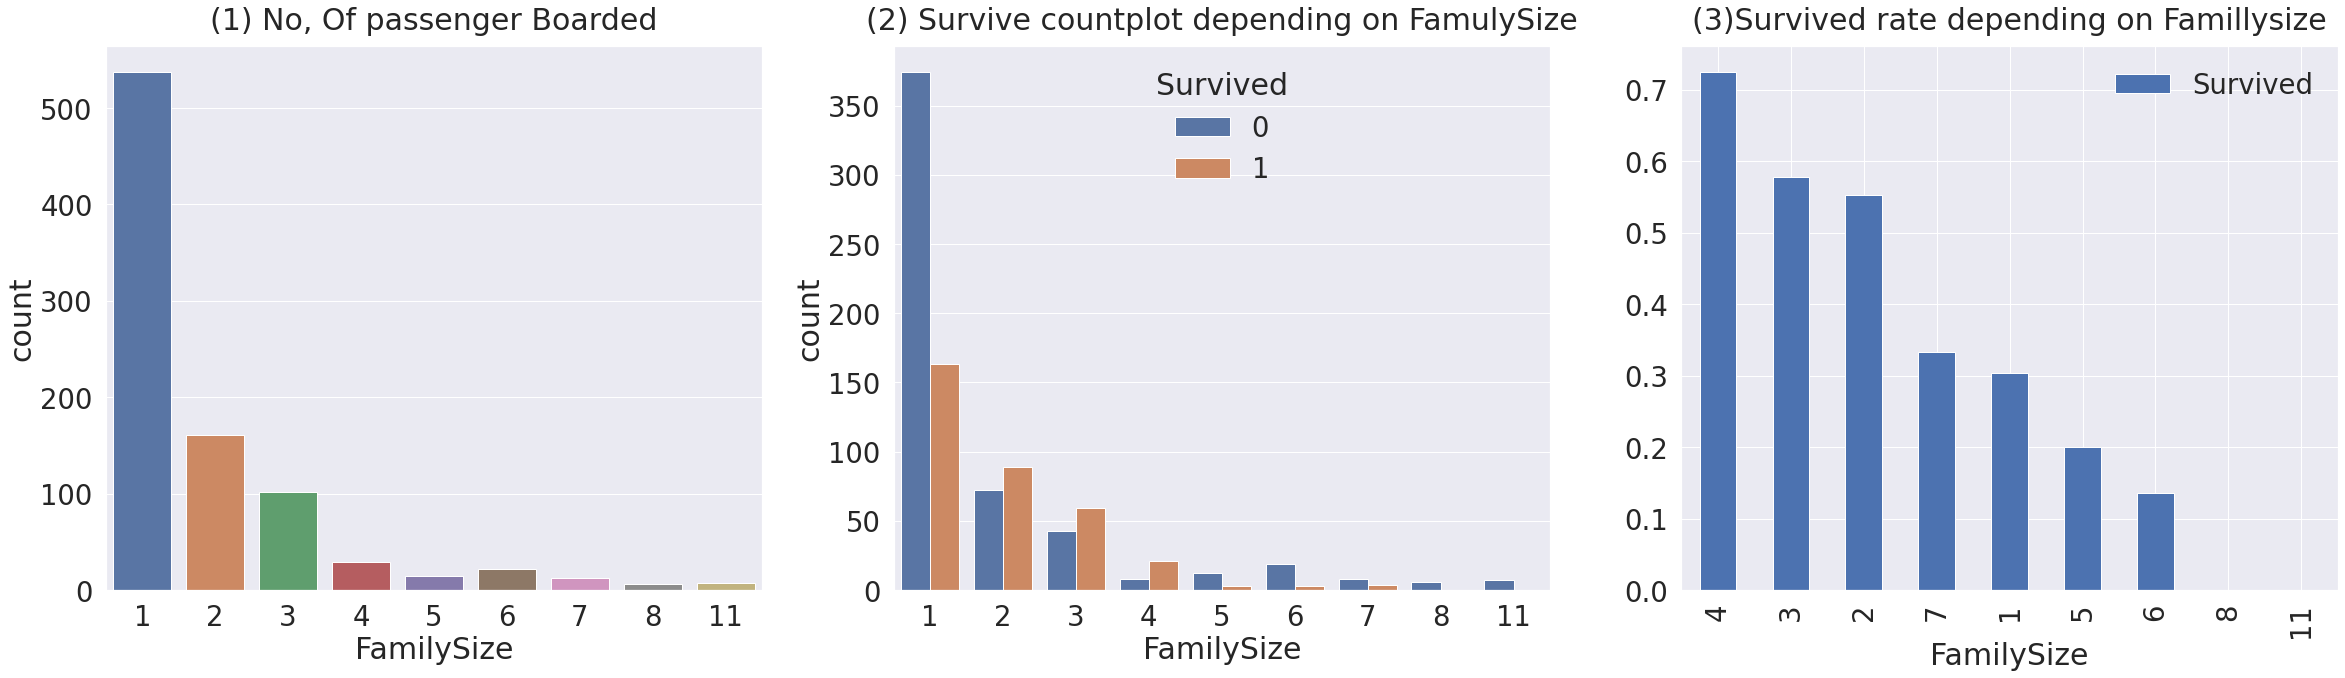

In [68]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('FamilySize', data=df_train, ax = ax[0])
ax[0].set_title('(1) No, Of passenger Boarded', y= 1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survive countplot depending on FamulySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3)Survived rate depending on Famillysize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

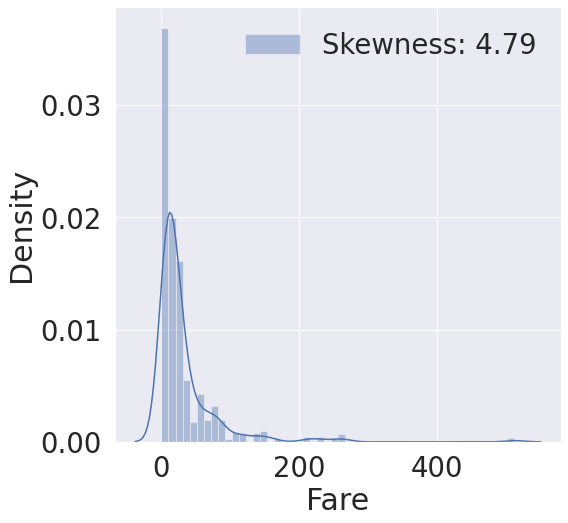

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew(), ax=ax))
g = g.legend(loc='best')

In [70]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i> 0 else 0)

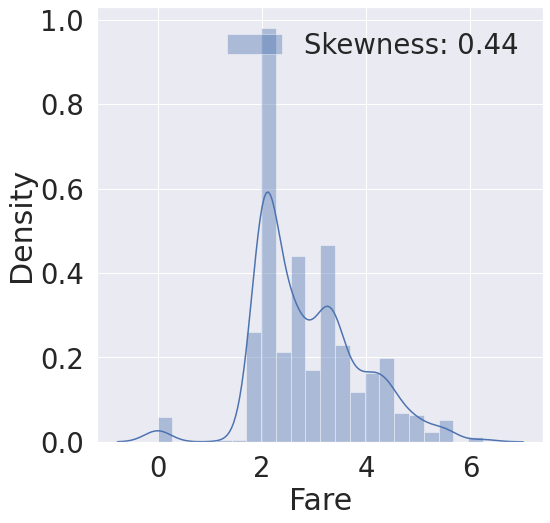

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew(), ax=ax))
g = g.legend(loc='best')

In [72]:
df_train['Ticket'].value_counts() #문자열은 제외하고 공부.

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [73]:
df_train['Age'].isnull().sum()

177

In [74]:
df_train['Name'].str.extract('([A-Za-z]*)\.') #str로 바뀜

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [75]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [76]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [77]:
df_train['Initial'].replace(['Mile', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], 
                            ['Miss', 'Miss', 'Miss', 'Mr', "Mr", 'Mrs', 'Mrs', 'Other','Other','Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)
df_test['Initial'].replace(['Mile', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], 
                            ['Miss', 'Miss', 'Miss', 'Mr', "Mr", 'Mrs', 'Mrs', 'Other','Other','Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)

In [78]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,408.864130,0.701087,2.298913,21.831081,0.706522,0.543478,3.113425,2.250000
Mlle,676.500000,1.000000,1.000000,24.000000,0.000000,0.000000,4.070251,1.000000
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='Initial'>

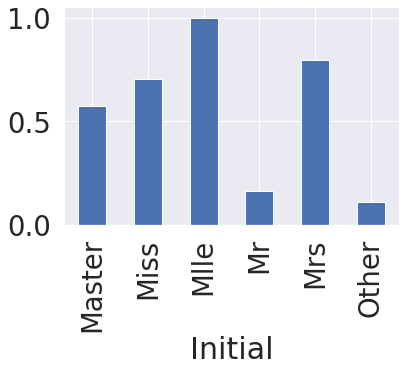

In [79]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [80]:
df_all = pd.concat([df_train, df_test])

In [81]:
df_all.reset_index(drop=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2.0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2.0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1.0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2.0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,NaN,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900000,C105,C,NaN,Mr
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,NaN,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,NaN,Mr


In [82]:
df_all.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,15.442677,4.675000
Miss,616.539924,0.701087,2.342205,21.814104,0.657795,0.498099,14.096861,2.250000
Mlle,676.500000,1.000000,1.000000,24.000000,0.000000,0.000000,4.070251,1.000000
Mr,658.831388,0.162571,2.359274,32.556397,0.286641,0.159533,10.003941,1.444234
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,23.896996,2.511811
Other,714.923077,0.111111,1.615385,44.923077,0.230769,0.153846,24.523034,1.222222


In [83]:
df_train.loc[1, :]

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                         38.0
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                    4.266662
Cabin                                                        C85
Embarked                                                       C
FamilySize                                                     2
Initial                                                      Mrs
Name: 1, dtype: object

In [84]:
df_train.loc[0, :] #0번째 컬럼의 전부를 가져와라

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                          1.981001
Cabin                              NaN
Embarked                             S
FamilySize                           2
Initial                             Mr
Name: 0, dtype: object

In [85]:
df_train.loc[df_train['Survived'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,2.409941,NaN,S,3,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,3.403555,NaN,C,2,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,1.977547,NaN,C,1,Miss
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,4.420746,C50,C,2,Mrs
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,3.258097,NaN,S,2,Mrs
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.401197,B42,S,1,Miss


In [86]:
(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr')

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [87]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,2.135148,NaN,Q,1,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,2.564949,NaN,S,1,Mr
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,1.977547,NaN,C,1,Mr
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,2.066331,NaN,S,1,Mr
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,1.978128,NaN,C,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,3.391147,C47,C,1,Mr
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,4.242046,NaN,S,11,Mr
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,1.978128,NaN,C,1,Mr
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,2.251292,NaN,S,1,Mr


In [88]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] #컬럼을 넣어주면?

5     NaN
17    NaN
26    NaN
29    NaN
36    NaN
       ..
839   NaN
846   NaN
859   NaN
868   NaN
878   NaN
Name: Age, Length: 120, dtype: float64

In [89]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = 33 #모든 널데이터를 33세로

In [90]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] #null데이터가 사라짐

Series([], Name: Age, dtype: float64)

In [91]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mrs'), 'Age'] = 37
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Master'), 'Age'] = 5
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Other'), 'Age'] = 45

df_test.loc[(df_test['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = 33
df_test.loc[(df_test['Age'].isnull()) & (df_train['Initial'] == 'Mrs'), 'Age'] = 37
df_test.loc[(df_test['Age'].isnull()) & (df_train['Initial'] == 'Master'), 'Age'] = 5
df_test.loc[(df_test['Age'].isnull()) & (df_train['Initial'] == 'Miss'), 'Age'] = 22
df_test.loc[(df_test['Age'].isnull()) & (df_train['Initial'] == 'Other'), 'Age'] = 45

In [92]:
df_train['Age'].isnull().sum()

0

In [93]:
df_train.shape

(891, 14)

In [94]:
df_train['Age_cat'] = 0

In [95]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [96]:
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0 #노가다 방식
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[(70 <= df_train['Age']), 'Age_cat'] = 7

In [97]:
df_test.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[(70 <= df_test['Age']), 'Age_cat'] = 7

In [98]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [99]:
def category_age(x): #함수 방식
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [100]:
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [101]:
(df_train['Age_cat'] == df_train['Age_cat_2']).all() #전체가 같은지 

True

In [102]:
df_train.drop(['Age', 'Age_cat_2'], axis = 1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [103]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Mlle'], dtype=object)

In [104]:
df_train.loc[df_train['Initial'] == 'Master', 'Initial']

7      Master
16     Master
50     Master
59     Master
63     Master
65     Master
78     Master
125    Master
159    Master
164    Master
165    Master
171    Master
176    Master
182    Master
183    Master
193    Master
261    Master
278    Master
305    Master
340    Master
348    Master
386    Master
407    Master
445    Master
480    Master
489    Master
549    Master
709    Master
751    Master
755    Master
787    Master
788    Master
802    Master
803    Master
819    Master
824    Master
827    Master
831    Master
850    Master
869    Master
Name: Initial, dtype: object

In [105]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [106]:
type(df_train.Embarked.unique())

numpy.ndarray

In [107]:
df_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [108]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [109]:
df_train.Embarked.head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [110]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [111]:
#df_train['Embarked'] = False
df_train.Embarked.isnull().any()

True

In [112]:
df_train['Embarked']

0      2.0
1      0.0
2      2.0
3      2.0
4      2.0
      ... 
886    2.0
887    2.0
888    2.0
889    0.0
890    1.0
Name: Embarked, Length: 891, dtype: float64

In [113]:
df_train.Embarked.isnull().sum()

2

In [114]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [115]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})

In [116]:
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [117]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

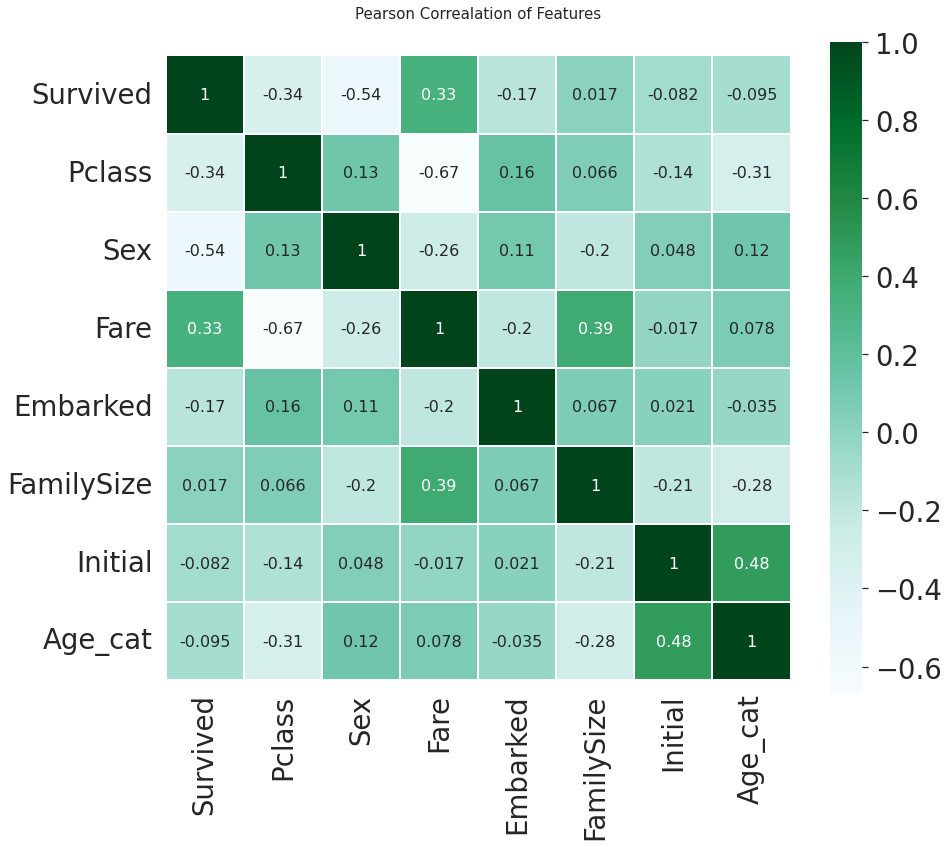

In [118]:
colormap = plt.cm.BuGn
plt.figure(figsize=(14, 12))
plt.title('Pearson Correalation of Features', y = 1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor ='white', annot=True, annot_kws={'size':16})

<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

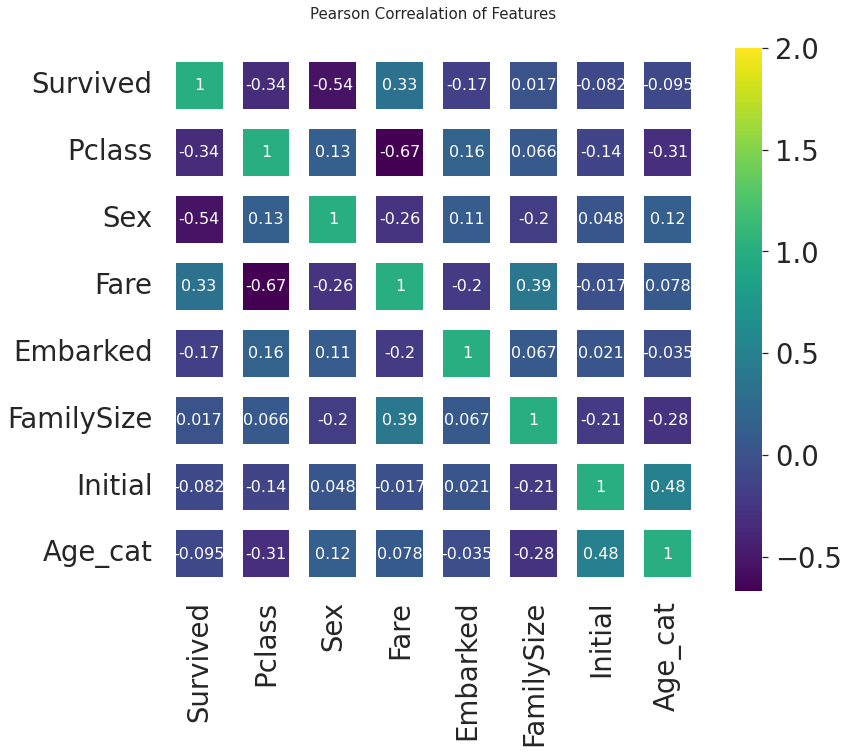

In [119]:
colormap = plt.cm.viridis
plt.figure(figsize=(12, 10))
plt.title('Pearson Correalation of Features', y = 1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=20, vmax=2.0,
           square=True, cmap=colormap, linecolor ='white', annot=True, annot_kws={'size':16})

<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

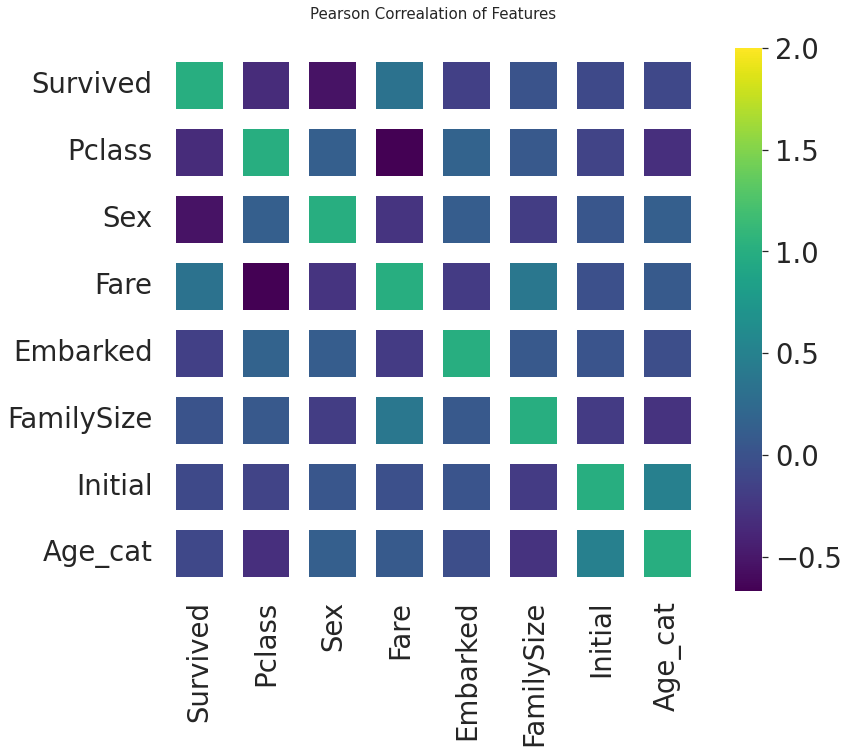

In [120]:
colormap = plt.cm.viridis
plt.figure(figsize=(12, 10))
plt.title('Pearson Correalation of Features', y = 1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=20, vmax=2.0,
           square=True, cmap=colormap, linecolor ='white', annot=False, annot_kws={'size':16})

<AxesSubplot:title={'center':'Pearson Correalation of Features'}>

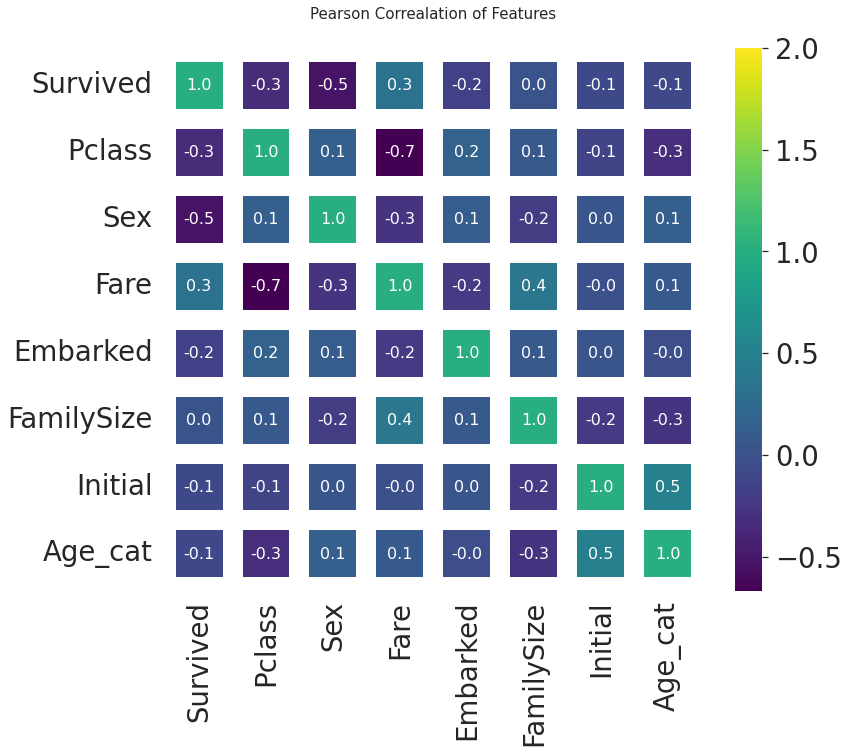

In [121]:
colormap = plt.cm.viridis
plt.figure(figsize=(12, 10))
plt.title('Pearson Correalation of Features', y = 1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=20, vmax=2.0,
           square=True, cmap=colormap, linecolor ='white', annot=True, annot_kws={'size':16}, fmt= '.1f')

In [122]:
#df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial') 

In [123]:
#df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [124]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2.0,2,2.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0.0,2,3.0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2.0,1,1.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2.0,2,3.0,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2.0,1,2.0,3


In [125]:
#df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis = 1, inplace=True)

In [126]:
df_test.head()

,Pclass,Sex,Fare,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,7.8292,3.0,0,0,1,0,0,0,1,0
1,3,0,7.0000,4.0,0,0,0,1,0,0,0,1
2,2,1,9.6875,6.0,0,0,1,0,0,0,1,0
3,3,1,8.6625,2.0,0,0,1,0,0,0,0,1
4,3,0,12.2875,2.0,0,0,0,1,0,0,0,1
